In [1]:
import numpy as np
import pandas as pd

In [2]:
loan=pd.read_csv("loan.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan.shape

(614, 13)

# Filling up catagorical missing value

In [6]:
loan["Gender"]=loan["Gender"].fillna(loan["Gender"].mode()[0])

In [7]:
loan["Married"]=loan["Married"].fillna(loan["Married"].mode()[0])

In [8]:
loan["Self_Employed"]=loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0])

In [9]:
loan["Dependents"]=loan["Dependents"].fillna(loan["Dependents"].mode()[0])

# Filling up numarical missing value

In [10]:
loan["LoanAmount"]=loan["LoanAmount"].fillna(loan["LoanAmount"].mean())

In [11]:
loan["Loan_Amount_Term"]=loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean())

In [12]:
loan["Credit_History"]=loan["Credit_History"].fillna(loan["Credit_History"].mean())

In [13]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
corr=loan.corr()

In [16]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


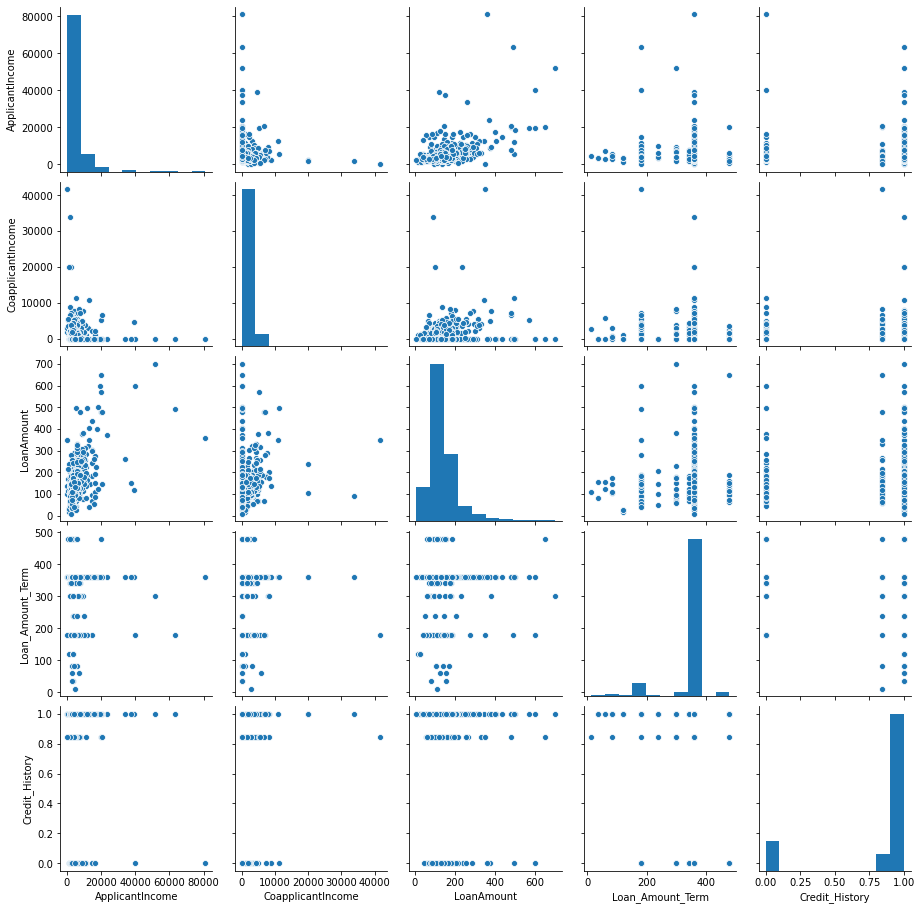

In [17]:
sns.pairplot(loan)

In [18]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

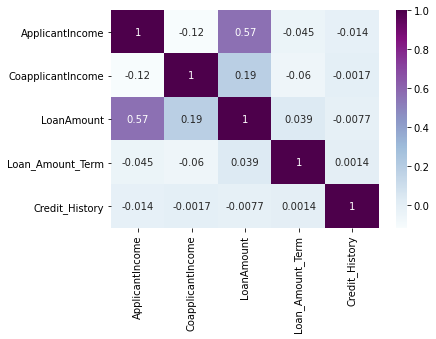

In [19]:
sns.heatmap(corr,annot=True,cmap='BuPu')

In [20]:
loan["total_income"]=loan["ApplicantIncome"]+loan["CoapplicantIncome"]

In [21]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [22]:
loan=loan[['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History',
      'Property_Area','total_income','Loan_Status']]

loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Education':{'Graduate':1',NotGraduate':0,
         'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2}},inplace=True)

              

loan["Loan_Status"]=loan["Loan_Status"].apply(lambda x:[i.replace('N',0)for i in x])

In [23]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,Loan_Status
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,Y
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,N
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,Y
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,Y
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,Y


loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Education':{'Graduate':1',NotGraduate':0, 'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2}},inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
catagorical=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [26]:
for col in catagorical:
    loan[col]=le.fit_transform(loan[col])

<ipython-input-26-efced3a5caf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan[col]=le.fit_transform(loan[col])


In [27]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,1
1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0,0
2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,1
3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,1
4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,1


In [28]:
loan["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

# value replace in pandas 

In [29]:
loan.replace({'Dependents':{'3+':4}},inplace=True)

C:\Users\Rahat\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


In [30]:
loan["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [31]:
loan

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,1
1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0,0
2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,1
3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,1
4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,2900.0,1
610,1,1,4,0,0,40.000000,180.0,1.0,0,4106.0,1
611,1,1,1,0,0,253.000000,360.0,1.0,2,8312.0,1
612,1,1,2,0,0,187.000000,360.0,1.0,2,7583.0,1


In [32]:
x=loan.iloc[:,0:10]
y=loan.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(614, 10) (552, 10) (62, 10)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)

In [36]:
from sklearn import svm
model=svm.SVC(kernel='linear')


In [37]:
model.fit(x_train_std,y_train)

SVC(kernel='linear')

In [38]:
x_train_pred=model.predict(x_train_std)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print("Accuracy of train data:",accuracy_score(x_train_pred,y_train))

Accuracy of train data: 0.8079710144927537


In [41]:
x_test_std=scaler.fit_transform(x_test)

In [42]:
x_test_pred=model.predict(x_test_std)

In [43]:
print("Accuracy of test data:",accuracy_score(x_test_pred,y_test))

Accuracy of test data: 0.8225806451612904


# Logistic

In [44]:
from sklearn.linear_model import LogisticRegression
model_lg=LogisticRegression()

In [45]:
model_lg.fit(x_train_std,y_train)

LogisticRegression()

In [46]:
x_train_pred_lg=model_lg.predict(x_train_std)

In [47]:
print("Accuracy of x_train :",accuracy_score(x_train_pred_lg,y_train))

Accuracy of x_train : 0.8061594202898551


In [48]:
x_test_pred_lg=model_lg.predict(x_test_std)

In [49]:
print("Accuracy of x_test :",accuracy_score(x_test_pred_lg,y_test))

Accuracy of x_test : 0.8225806451612904


# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_predict

In [51]:
predit=cross_val_predict(model,x_test_std,y_test,cv=3)

In [52]:
predit

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(predit,y_test)

array([[10,  4],
       [ 9, 39]], dtype=int64)

In [55]:
accuracy_score(predit,y_test)

0.7903225806451613

# Loan approverd or Not

In [56]:
input_data=(0,0,0,0,1,133.000000,360.0,0.0,1,4583.0)

In [57]:
input_numpy=np.asarray(input_data)

In [58]:
input_reshape=input_numpy.reshape(1,-1)

In [59]:
std_input=scaler.transform(input_reshape)

In [60]:
prediction=model.predict(std_input)

In [61]:
print(prediction)

[0]


In [62]:
if prediction[0]==0:
    print("Loan Not Approved")
else:
    print("Loan Approved")

Loan Not Approved
